In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df=pd.read_excel('/content/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#to know the column name
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.shape

(10683, 11)

In [ ]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [ ]:
df['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1,inplace=True)

In [ ]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
df.dropna(inplace=True)# to drop NAN

In [ ]:
df.isna().sum()# to find if there is missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

**EDA**-date of journey is an object type here so converting it into timestamp

In [ ]:
df['Journey_day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day#dt.day will only extract day of that month

In [ ]:
df["Journey_month"] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month# month is extracted

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
 #Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1,inplace=True) 

In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


# **Handling categorical Data**


we can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case ,


Ordinal data --> data are in order --> LabelEncoder is used in this case

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

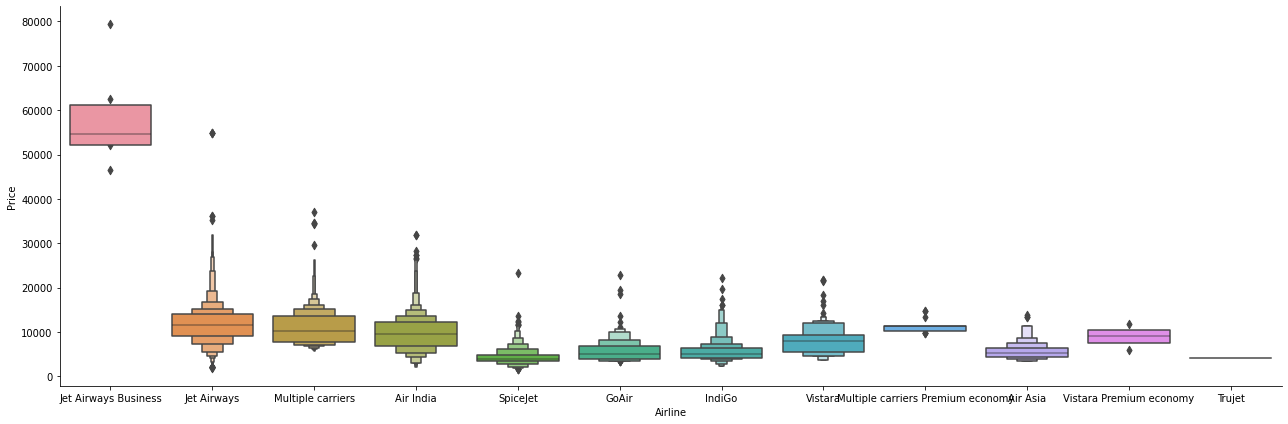

In [ ]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

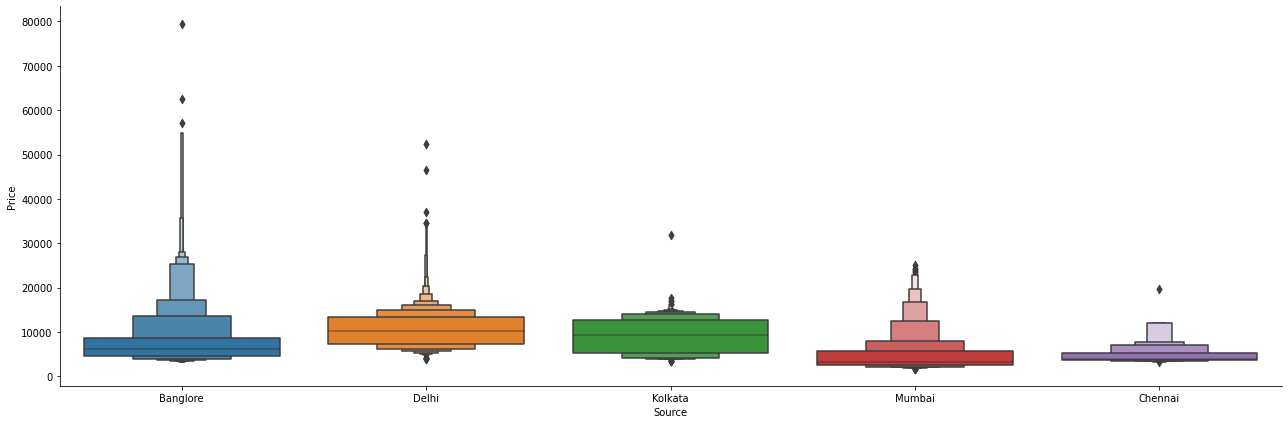

In [ ]:
#source vs price
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

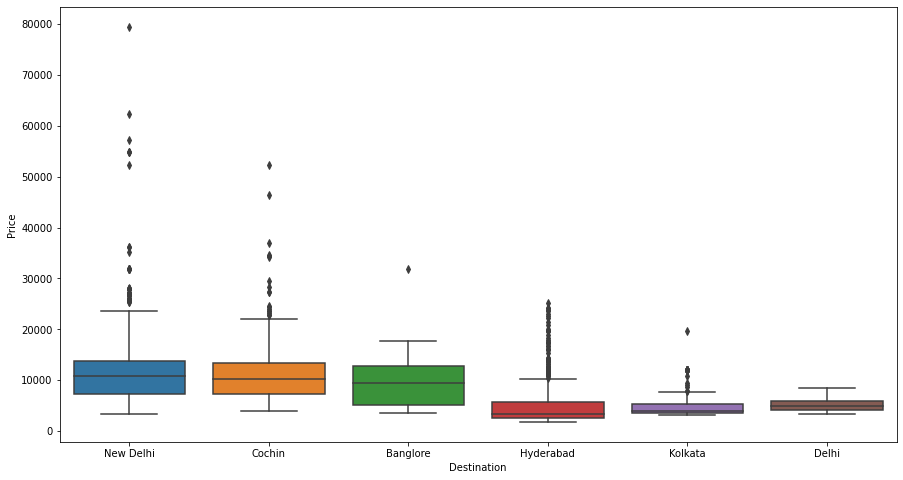

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [ ]:
#as Airline,Source,Destination are nomimal data we are performing onehotenoding
dummy=pd.get_dummies(df[['Airline','Source','Destination',]],drop_first=True)
dummy.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe=pd.concat([df,dummy],axis=1)
dfe

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19,55,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,8,20,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11,30,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe.drop(['Airline','Source','Destination',],inplace=True,axis=1)

In [ ]:
dfe

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,non-stop,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2 stops,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,19h,2 stops,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1 stop,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1 stop,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,non-stop,4107,9,4,19,55,22,25,0,...,0,0,0,1,0,0,0,0,0,0
10679,2h 35m,non-stop,4145,27,4,20,45,23,20,1,...,0,0,0,1,0,0,0,0,0,0
10680,3h,non-stop,7229,27,4,8,20,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,2h 40m,non-stop,12648,1,3,11,30,14,10,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfe['Duration']=le.fit_transform(dfe['Duration'])

dfe.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

#**outliers**
An outlier is a single data point that goes far outside the average value of a group of statistics.  



**checking if there is any outliers or not**

In [ ]:
# importing the module
import plotly
import plotly.express as px

# plotting scattered graph
fig = px.scatter([i for i in range(len(dfe['Price']))], y=dfe['Price'])
fig.show()

**handling outliers**
**train the dataset using isolation forest**


In [ ]:
# importing the required module
from sklearn.ensemble import IsolationForest

# initializing the isolation forest
isolation_model = IsolationForest(contamination = 0.003)

# training the model 
isolation_model.fit(dfe)

# making predictions 
IF_predictions = isolation_model.predict(dfe)

In [ ]:

# printing
print(IF_predictions)
#all the predictions are either 1 or -1. Where 1 shows the data point is normal while -1 represents the outliers.

[1 1 1 ... 1 1 1]


In [ ]:
dfe.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,240,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,336,2,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,106,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,311,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,303,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe.shape

(10682, 29)

#TEST DATA

In [ ]:
 test=pd.read_excel('/content/Test_set.xlsx')
 test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

test.drop(["Route", "Additional_Info"], axis = 1,inplace=True)

In [ ]:
test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

In [ ]:
test['Journey_day']=pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.day#dt.day will only extract day of that month

In [ ]:
test["Journey_month"] = pd.to_datetime(test['Date_of_Journey'], format="%d/%m/%Y").dt.month# month is extracted

In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
 #Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour

# Extracting Minutes
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test.drop(["Dep_Time"], axis = 1,inplace=True) 

In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour

# Extracting Minutes
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
test.drop(["Arrival_Time"], axis = 1, inplace = True)

# **Handling categorical Data**

In [ ]:
# as Airline,Source,Destination are nomimal data we are performing onehotenoding
dumm_y=pd.get_dummies(test[['Airline','Source','Destination',]],drop_first=True)
dumm_y.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
tests=pd.concat([test,dumm_y],axis=1)


In [ ]:
tests.drop(['Airline','Source','Destination',],inplace=True,axis=1)

In [ ]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
tests['Duration']=le.fit_transform(tests['Duration'])

tests.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
tests.shape

(2671, 27)

In [ ]:
tests.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10,1,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,248,1,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,148,1,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,36,1,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,216,0,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [ ]:
X = dfe.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration',
        'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,240,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,336,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,106,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,311,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,303,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=dfe['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

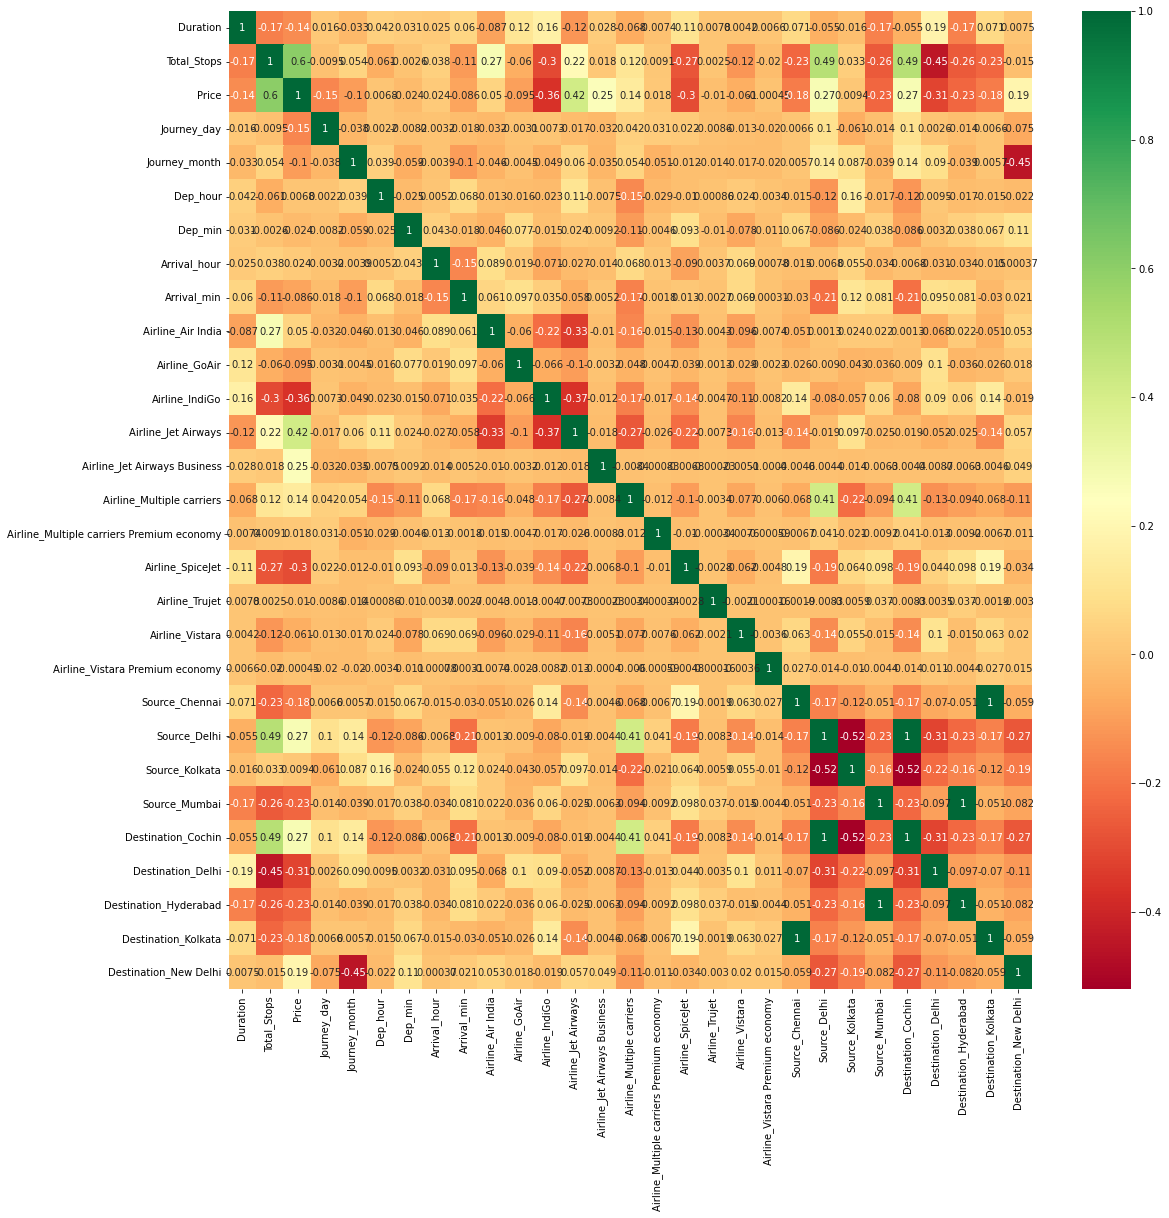

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(dfe.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [ ]:
selection.feature_importances_

array([2.65765461e-01, 1.44274824e-01, 5.46348334e-02, 2.65716198e-02,
       2.58156742e-02, 3.10139272e-02, 2.28165737e-02, 2.82556034e-02,
       1.58010749e-02, 1.78089415e-03, 1.72380623e-02, 1.64515362e-01,
       6.81074863e-02, 1.75320529e-02, 9.29923364e-04, 3.84274629e-03,
       1.69353544e-04, 6.51082311e-03, 8.82977029e-05, 4.87420966e-04,
       1.64377020e-02, 3.15256304e-03, 8.17001766e-03, 2.01932920e-02,
       2.28070289e-02, 7.92584125e-03, 4.84722564e-04, 2.46768188e-02])

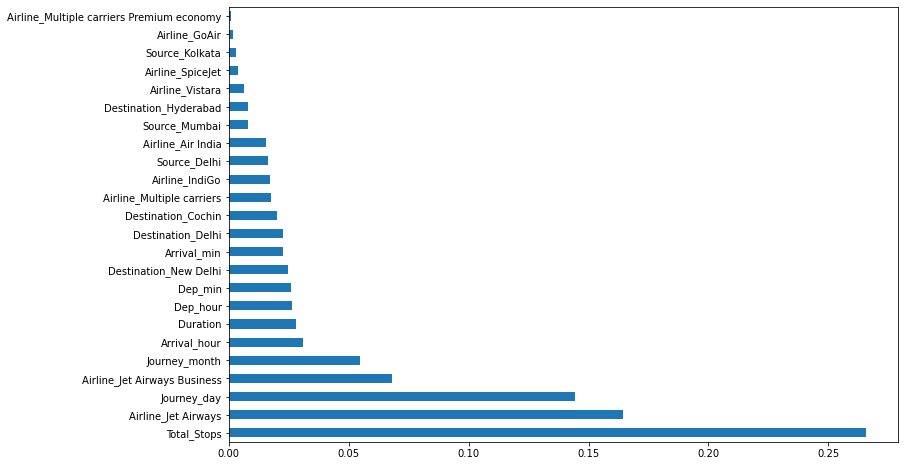

In [ ]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(12,8))
feature=pd.Series(selection.feature_importances_,index=X.columns)
feature.nlargest(24).plot(kind='barh')
plt.show()


In [ ]:
X.shape

(10682, 28)

In [ ]:
X.drop(['Airline_Vistara Premium economy','Airline_Trujet','Destination_Kolkata','Source_Chennai'],axis=1,inplace=True)

In [ ]:
X.shape

(10682, 24)

# fitting model using random forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X,y)


RandomForestRegressor()

In [ ]:
y_pred=reg.predict(X_test)

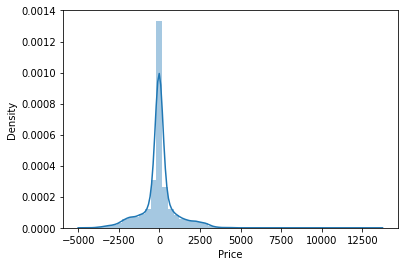

In [ ]:
#ploting for viswalisation
sns.distplot(y_test-y_pred)
plt.show()

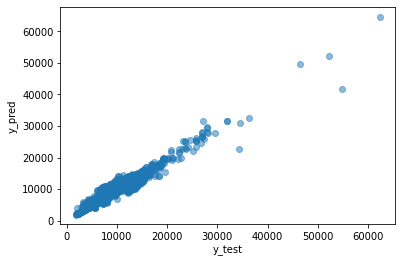

In [ ]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 598.2727460248626
MSE: 1084240.4933517168
RMSE: 1041.268694118726


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9504234186960628


# hyperparameter tuning
**to find the best parameters for accuracy**

Choose following method for hyperparameter tuning

RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, n_jobs=-1, random_state=42)
# a "job" refers to the training and evaluation of a ((train/test split), parameter_combination)

In [ ]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

MSE: 3633268.3219672176
RMSE: 1906.1134074254915
MAE: 1176.1868395904996


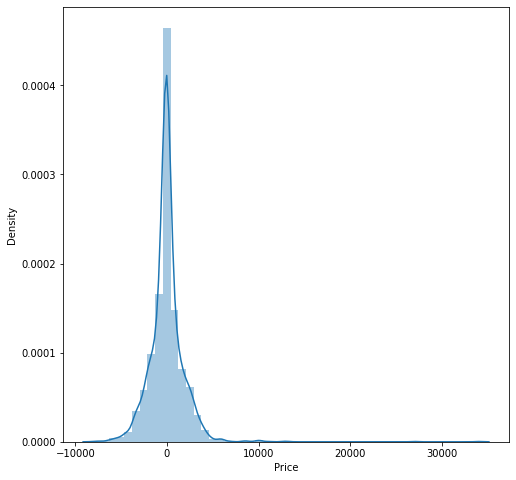

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print(r2_score(y_test,prediction))

0.8338698623898413


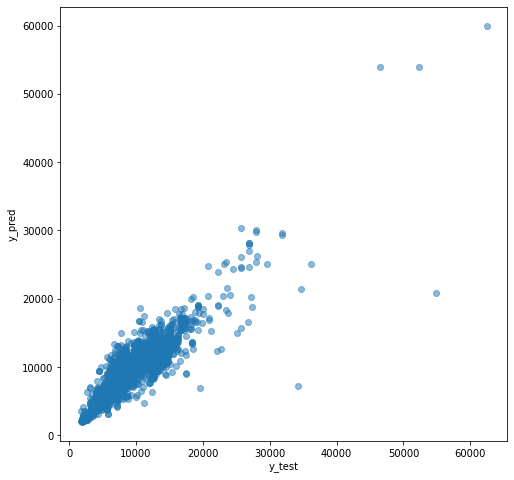

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()